<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/5_3_Linear_Classifiers_in_Python_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-3 Linear Classifiers in Python - Logistic Regression

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Logistic regression and classification

### Regularized logistic regression

- **Regularization** combats overfitting by making the model coefficients smaller
- The hyperparamter `C` is the inverse of the regularization strength
    - Large `C` means less regulariztion
    - Smaller `C` means more regularization
    - The default for `LogisticRegression` is `C=1.0`
    - `C` must be a positive float
    - Technically, there is no exact value of `C` that “turns off” regularization completely.
	- However, setting `C` to a very large value (e.g., C=1e10 or higher) makes regularization negligible.
	- If you truly want to disable regularization, set `penalty=None` (in older versions) or use `solver="lbfgs"` with `penalty=None` in newer versions.

<img src='https://drive.google.com/uc?export=view&id=11MXogSmtGgRzA_NZOwuhdIYhzDFcTBW6'>

### How does regularization affect train and test accuracy?

```python
# movie database
lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=0.01)

lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

# less regularization means higher training accuracy
lr_weak_reg.score(X_train, y_train)     # 1.0
lr_strong_reg.score(X_train, y_train)   # 0.92
```

`regularized loss = original loss + large coefficient penalty`

- more regularization: lower training accuracy

```python
# regularization improves test accuracy
lr_weak_reg.score(X_test, y_test)   # 0.86
lr_strong_reg.score(X_test, y_test) # 0.88
```

- **more regularization**:
    - lower training accuracy
    - (almost always) higher test accuracy
    - **Less overfitting**

### L1 vs. L2 regularization

- For linear regression we use the terms **Lasso** and **Ridge** for two different types of regularization. The general names for these concepts, outside of linear regression are **L1** and **L2** regularization
    - **Lasso**: linear regression with **L1** regularization
    - **Ridge**: linear regression with **L2** regularization
- Both help reduce overfitting
- **L1** also performs feature selection

#### Example: Breast Cancer

In [2]:
breast_cancer = datasets.load_breast_cancer()

display(breast_cancer.feature_names)
display(breast_cancer.target_names)

X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

((569, 30), (569,))

In [3]:
X = StandardScaler().fit_transform(X)
print(X, '\n\n', y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [5]:
# the default solver is not compatible with l1 regulariztion
lr_L1 = LogisticRegression(solver='liblinear', penalty='l1')
lr_L2 = LogisticRegression()    # penalty=L2 by default

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

lr_L1.score(X_train, y_train), lr_L2.score(X_train, y_train)

(0.9868766404199475, 0.9921259842519685)

In [6]:
lr_L1.score(X_test, y_test), lr_L2.score(X_test, y_test)

(0.973404255319149, 0.973404255319149)

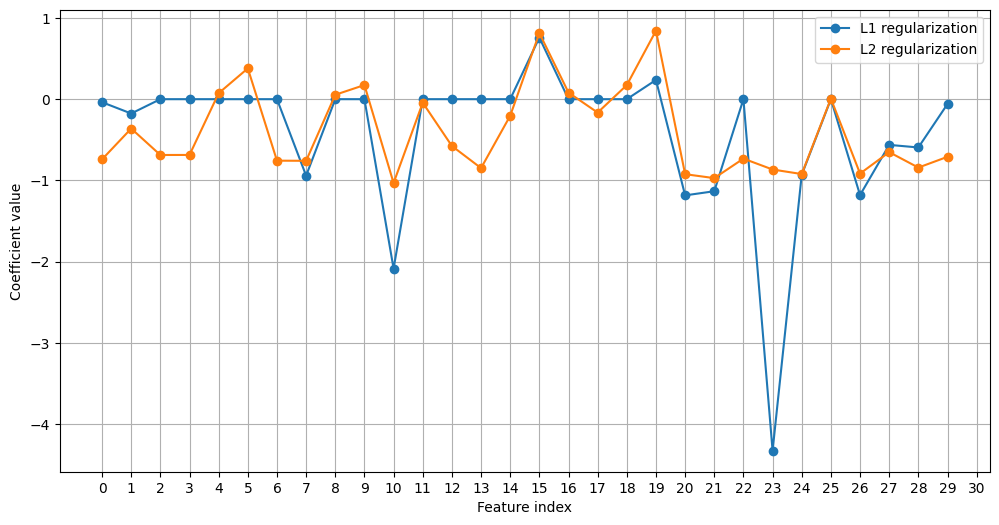

In [7]:
_, ax = plt.subplots(figsize=(12, 6))
plt.plot(lr_L1.coef_.flatten(), marker='o', label='L1 regularization')
plt.plot(lr_L2.coef_.flatten(), marker='o', label='L2 regularization')

ax.set_xlabel('Feature index')
ax.set_ylabel('Coefficient value')
ax.set_xticks(range(0, 31))

plt.legend()
plt.grid()
plt.show()

- Notice that **L1 Regularization** sets many of the coefficients to zero, thus ignoring those features; in other words, it performed feature selection
- **L2 regularization** just shrinks the coefficients

### Regularized logistic regression

In [8]:
digits = datasets.load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

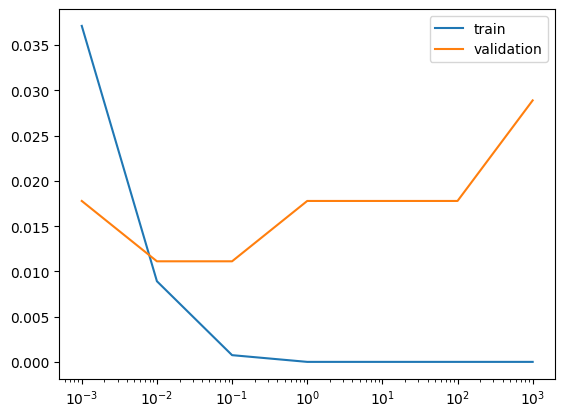

In [9]:
# train and validation errors initialized as empty lists
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)

    # evaluate error rates and apped to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))

# plot results (x-axis is on a log scale)
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(('train', 'validation'))
plt.show()

### Logistic regression and feature selection

```python
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))
```

## Logistic regression and probabilities

<img src='https://drive.google.com/uc?export=view&id=17wl-atgczNJ2zGa8emqwuDwZNQG5euuK'>

- The effect of regularization is that the probabilities are closer to 0.5
    - Smaller coefficients mean less confident predictions
    - This fits with the story, regularization is supposed to combat overfitting and there is a connection betwen overconfidence and overfitting
- With 2 features we have 2 coefficients
    - The ratio of the coefficients gives us the slope of the decision boundary line
    - The magnitude of the coefficients gives us our confidence level
- Regularization not only affects teh confidence, but aslo the orientation of the decision boundary

<img src='https://drive.google.com/uc?export=view&id=1X2vDIW2HjyrZ0iIj4-8qLfSfc-HeSxnN'>

### How are these probabilities computed?

- Like the definite class predictions they come from the raw model output
    - The sign of the raw model output gives us the prediction
- The probabilities come from the magnitude of the raw model output
    - The raw model output can be any number, but probabilities are between 0 and 1
    - We need a way to "squash" the raw model output to a number between 0 and 1
    - The **sigmoid function** takes care of that for us

<img src='https://drive.google.com/uc?export=view&id=1Iin8bCnzat8NW59JbDpZIGWov2gT_y1r'>

### Regularization and probabilities

In [10]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [11]:
for C in [1, 0.1]:
    model = LogisticRegression(C=C)
    model.fit(X, y)
    prob = model.predict_proba(X)
    print(f'Maximum predicted probabilty when C={C}', np.max(prob))

Maximum predicted probabilty when C=1 0.9973152198521483
Maximum predicted probabilty when C=0.1 0.9351932153846491


### Visualizing easy and difficult examples: digits data

In [12]:
# digits
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [13]:
lr = LogisticRegression()
lr.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
proba = lr.predict_proba(X)
print(proba.shape)
proba

(1797, 10)


array([[1.00000000e+00, 7.93259099e-22, 7.77247350e-16, ...,
        1.66769425e-12, 2.20866221e-12, 9.14737266e-13],
       [1.67211468e-20, 9.99999556e-01, 5.63462784e-11, ...,
        1.65244849e-12, 1.09108397e-07, 4.56392025e-12],
       [9.45084909e-15, 5.52828603e-04, 9.99443163e-01, ...,
        4.60663648e-12, 3.99845480e-06, 7.93522232e-16],
       ...,
       [1.70517232e-13, 1.56254054e-07, 4.93225162e-12, ...,
        3.68387139e-13, 9.99896295e-01, 2.86402504e-13],
       [3.28947527e-07, 1.19845289e-11, 6.89441113e-16, ...,
        1.39088689e-11, 1.01695675e-06, 9.99998654e-01],
       [4.61082821e-12, 5.26548806e-09, 4.66326370e-12, ...,
        1.61124401e-14, 9.99976358e-01, 2.51484524e-07]])

In [15]:
np.max(proba, axis=1).shape

(1797,)

In [16]:
# smallest to largest
np.sort(np.max(proba, axis=1))

array([0.80801367, 0.84591828, 0.88226893, ..., 1.        , 1.        ,
       1.        ])

In [17]:
proba_inds = np.argsort(np.max(proba, axis=1))
proba_inds

array([1658, 1553,  363, ..., 1419, 1625,   32])

In [18]:
def show_digit(X, y, image_index, lr):
    image = X[image_index].reshape(8, 8)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    title = f'label={y[image_index]}, '
    title += f'prediction={lr.predict(X[image_index].reshape(1, -1))[0]}, '
    title += f'proba={lr.predict_proba(X[image_index].reshape(1, -1))[0].max().round(2).item()}'
    plt.title(title)


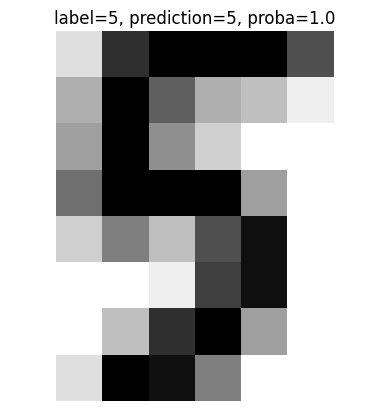

In [19]:
show_digit(X, y, proba_inds[-1], lr)

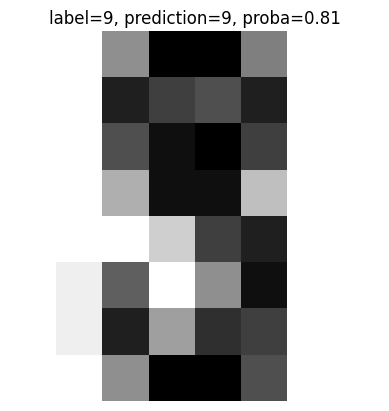

In [20]:
show_digit(X, y, proba_inds[0], lr)

## Multi-class logistic regression

### Combining binary classifiers with one-vs-rest

- Train a series of classifiers for each class

In [21]:
wine = datasets.load_wine()
X, y = wine.data, wine.target
X.shape, y.shape, wine.feature_names, wine.target_names

((178, 13),
 (178,),
 ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [22]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [23]:
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()

lr0.fit(X, y==0)
lr1.fit(X, y==1)
lr2.fit(X, y==2)

LogisticRegression()

In [24]:
# `.decision_function()` gives the raw model output
# We take the result from the model that has the larges raw model output
lr0.decision_function(X)[0], lr1.decision_function(X)[0], lr2.decision_function(X)[0]

(np.float64(7.391708022868318),
 np.float64(-6.296616077494834),
 np.float64(-7.921109148626425))

#### But we can get `sklearn` to do the work for us

In [25]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [26]:
lr.score(X, y)

1.0

In [27]:
lr_ovr = OneVsRestClassifier(LogisticRegression())
lr_ovr.fit(X, y)

OneVsRestClassifier(estimator=LogisticRegression())

In [28]:
lr_ovr.score(X, y)

1.0

In [29]:
lr.coef_

array([[ 1.43426069,  0.45601208,  0.97811082, -1.48351487,  0.16785475,
         0.31724531,  0.95347956, -0.21488428, -0.14330671, -0.0039786 ,
         0.04591599,  1.05330819,  1.85675383],
       [-1.55646175, -0.66769366, -1.1584709 ,  0.78613189, -0.11397689,
         0.03598789,  0.51771358,  0.37515348,  0.21242552, -1.97388064,
         0.9991408 ,  0.04418103, -1.8980777 ],
       [ 0.50953753,  0.48345541,  0.61254816,  0.35037609,  0.20594457,
        -0.3777377 , -1.51425912,  0.00342115, -0.70998652,  1.18227858,
        -1.21076333, -1.16526158,  0.10023826]])

In [30]:
for estimator in lr_ovr.estimators_:
    print(estimator.coef_)

[[ 1.43426069  0.45601208  0.97811082 -1.48351487  0.16785475  0.31724531
   0.95347956 -0.21488428 -0.14330671 -0.0039786   0.04591599  1.05330819
   1.85675383]]
[[-1.55646175 -0.66769366 -1.1584709   0.78613189 -0.11397689  0.03598789
   0.51771358  0.37515348  0.21242552 -1.97388064  0.9991408   0.04418103
  -1.8980777 ]]
[[ 0.50953753  0.48345541  0.61254816  0.35037609  0.20594457 -0.3777377
  -1.51425912  0.00342115 -0.70998652  1.18227858 -1.21076333 -1.16526158
   0.10023826]]


In [31]:
lr.intercept_

array([-1.86581587, -1.50343636, -3.61242139])

In [32]:
for estimator in lr_ovr.estimators_:
    print(estimator.intercept_)

[-1.86581587]
[-1.50343636]
[-3.61242139]


#### One-vs-Rest Vs. Multinomial (softmax)

- One-vs-rest:
    - fit a binary classifier for each class
    - predict with all, take the largest output
    - pro: simple, modular
    - con: not directrly optimizing accuracy
    - common for SVMs as well
    - can produce probabilities
- Multinomial or softmax
    - fit a single classifier for all classes
    - prediction directly outputs best class
    - con: more complicated, new code
    - pro: tackle the problem directly
    - possible for SVMs, but less common
    - can produce probabilities

In [33]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [34]:
# this gets rid of the warning
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)

LogisticRegression()

In [35]:
lr.coef_

array([[ 0.8121452 ,  0.20245508,  0.47041906, -0.84175663,  0.04838652,
         0.20755877,  0.6528666 , -0.19660028,  0.13911376,  0.17791924,
         0.12857678,  0.7279941 ,  1.07910229],
       [-1.01293134, -0.44044169, -0.84700727,  0.58181078, -0.09604902,
         0.03202783,  0.35140871,  0.21096695,  0.26093181, -1.04353498,
         0.68081149,  0.0513317 , -1.14314703],
       [ 0.20078614,  0.2379866 ,  0.37658821,  0.25994586,  0.04766251,
        -0.2395866 , -1.00427531, -0.01436667, -0.40004557,  0.86561574,
        -0.80938827, -0.7793258 ,  0.06404474]])

In [36]:
lr.intercept_

array([ 0.41504225,  0.70048649, -1.11552875])

In [37]:
# the values are similar
lr_ovr.predict_proba(X)[0], lr.predict_proba(X)[0]

(array([9.97801479e-01, 1.83622820e-03, 3.62293148e-04]),
 array([9.99783128e-01, 1.92652490e-04, 2.42197360e-05]))

### Fitting multi-class logistic regression

In [38]:
# digits
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [40]:
# on-vs-rest
lr_ovr = OneVsRestClassifier(LogisticRegression())
lr_ovr.fit(X_train, y_train)

lr_ovr.score(X_train, y_train),lr_ovr.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(0.9955456570155902, 0.9755555555555555)

In [41]:
# softmax
lr_mn = LogisticRegression(solver='lbfgs')
lr_mn.fit(X_train, y_train)

lr_mn.score(X_train, y_train), lr_mn.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1.0, 0.9733333333333334)

### Visualizing multi-class logistic regression